In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [49]:
def gd(x_0, m, lr, function, diff):
    previous_x = x_0
    history_x = [previous_x]
    history_y = [function(previous_x)]
    convergence_rate = []

    for i in range(m):
        new_x = previous_x - lr * diff(previous_x)
        new_y = function(new_x)
        history_x.append(new_x)
        history_y.append(new_y)

        if i > 0:
            rate = abs(history_y[-1] - history_y[-2]) / abs(history_y[-2])
            convergence_rate.append(rate)
        
        previous_x = new_x

    return history_x, history_y, convergence_rate

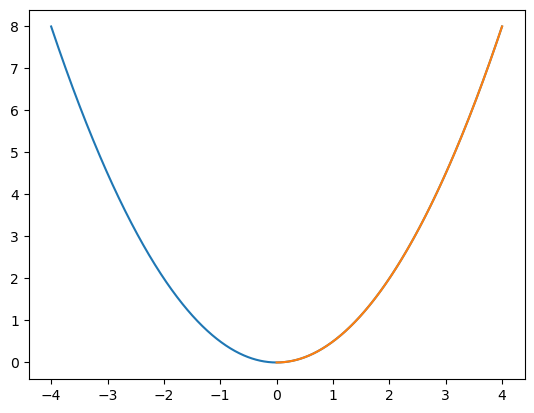

In [53]:
def func1(x):
    return (x**2)/2
def diff1(x):
    return x

x_0 = 4
history_x, history_y, convergence_rate_gd  = gd(x_0, 1000, 0.01, func1, diff1)

x = np.linspace(-x_0, x_0, 1000)
y = func1(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.plot(history_x, history_y)
plt.show()

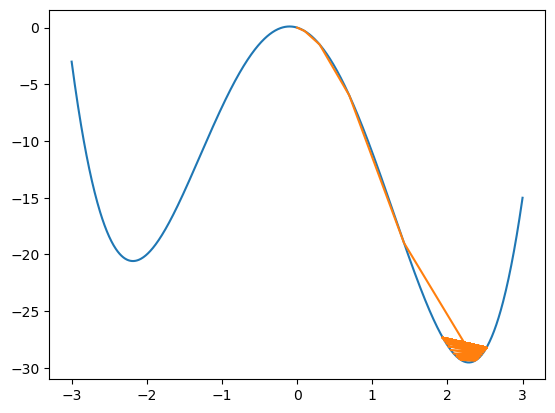

In [55]:
def func2(x):
    return x**4 -10*x**2 - 2*x
def diff2(x):
    return 4*x**3-20*x - 2
    
x_0 = 0
history_x, history_y, convergence_rate_gd = gd(x_0, 100, 0.05, func2, diff2)

x = np.linspace(-3, 3, 1000)
y = func2(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.plot(history_x, history_y)
plt.show()

In [57]:
def sgd(x_0, m, lr, function, diff, noise_type, sigma=0.1):
    noise = random.random()
    previous_x = x_0
    history_x = [previous_x]
    history_y = [function(previous_x)]
    convergence_rate = []

    for i in range(m):
        if noise_type == 'uniform':
            noise = random.uniform(-sigma, sigma)
        elif noise_type == 'normal':
            noise = random.gauss(0, sigma)
        
        new_x = previous_x - lr * diff(previous_x) + noise
        new_y = function(new_x)
        history_x.append(new_x)
        history_y.append(new_y)

        if i > 0:
            rate = abs(history_y[-1] - history_y[-2]) / abs(history_y[-2])
            convergence_rate.append(rate)

        previous_x = new_x

    return history_x, history_y, convergence_rate


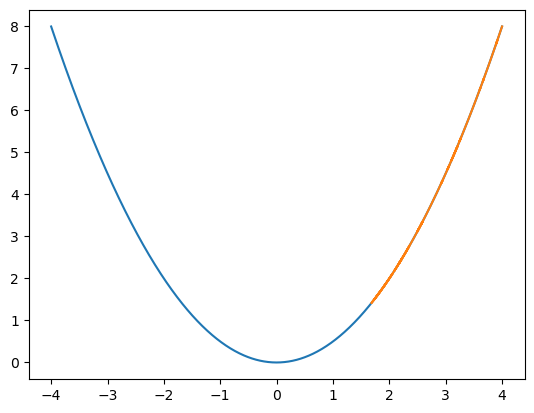

In [59]:
def func1(x):
    return (x**2)/2
def diff1(x):
    return x

x_0 = 4
history_x, history_y, convergence_rate_sgd = sgd(x_0, 100, 0.01, func1, diff1, noise_type = 'uniform', sigma = 0.1)

x = np.linspace(-x_0, x_0, 1000)
y = func1(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.plot(history_x, history_y)
plt.show()

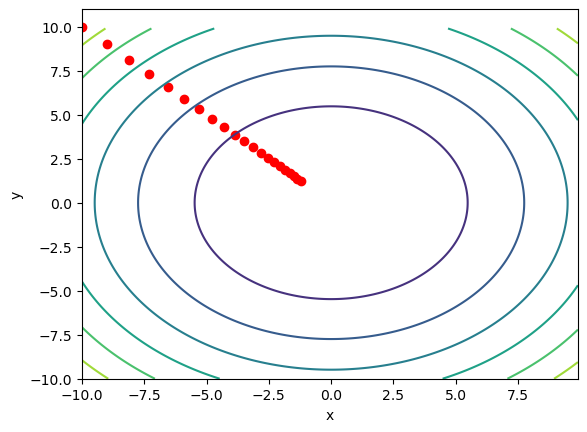

In [61]:
def f(x, y):
    return 0.5*(x**2 + y**2)

def df_dx(x, y):
    return x

def df_dy(x, y):
    return y

def gd2(x_0, y_0, m, lr):
    previous_x = x_0
    previous_y = y_0
    history_x = [previous_x]
    history_y = [previous_y]
    history_f = [f(previous_x, previous_y)]

    for i in range(m):
        diff_x = df_dx(previous_x, previous_y)
        diff_y = df_dy(previous_x, previous_y)
        
        x = previous_x - lr * diff_x
        y = previous_y - lr * diff_y
        previous_x = x
        previous_y = y
        history_x.append(x)
        history_y.append(y)
        history_f.append(f(x,y))

    return history_x, history_y, history_f

x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

x_0, y_0 = -10, 10
lr = 0.1
m = 20
history_x, history_y, history_f = gd2(x_0, y_0, m, lr)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z)
ax.scatter(history_x, history_y, c='r', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

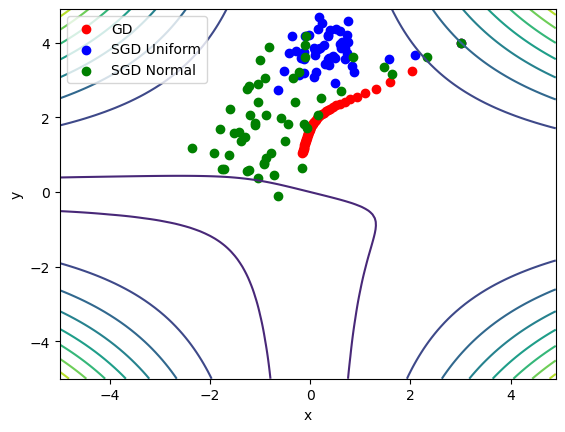

In [63]:
def f(x, y):
    return x**2 * y**2 + x + 3*y

def df_dx(x, y):
    return 2*x * y**2 + 1

def df_dy(x, y):
    return x**2 * 2* y + 3
    
def sgd2(x_0, y_0, m, lr, noise_type, sigma=0.1):
    previous_x = x_0
    previous_y = y_0
    history_x = [previous_x]
    history_y = [previous_y]
    history_f = [f(previous_x, previous_y)]

    for i in range(m):
        if noise_type == 'uniform':
            noise_x = random.uniform(-sigma, sigma)
            noise_y = random.uniform(-sigma, sigma)
        elif noise_type == 'normal':
            noise_x = np.random.normal(0, sigma)
            noise_y = np.random.normal(0, sigma)
            
        diff_x = df_dx(previous_x, previous_y)
        diff_y = df_dy(previous_x, previous_y)
        
        x = previous_x - lr * diff_x + noise_x
        y = previous_y - lr * diff_y + noise_y
        previous_x = x
        previous_y = y
        history_x.append(x)
        history_y.append(y)
        history_f.append(f(x,y))

    return history_x, history_y, history_f

x_range = np.arange(-5, 5, 0.1)
y_range = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z)

x_0, y_0 = 3, 4
lr = 0.01
m = 50

history_x, history_y, history_f = gd2(x_0, y_0, m, lr)
ax.scatter(history_x, history_y, c='r', marker='o', label='GD')

history_x, history_y, history_f = sgd2(x_0, y_0, m, lr, 'uniform', 0.5)
ax.scatter(history_x, history_y, c='b', marker='o', label='SGD Uniform')

history_x, history_y, history_f = sgd2(x_0, y_0, m, lr, 'normal', 0.5)
ax.scatter(history_x, history_y, c='g', marker='o', label='SGD Normal')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()
plt.show()

In [89]:
def mommentum(x_0, m, lr, function, diff, gamma):
    previous_x = x_0
    previous_v = 0
    history_x = [previous_x]
    history_y = [function(previous_x)]
    convergence_rate = []
    for i in range(m):
        new_v = gamma*previous_v - lr * diff(previous_x)
        new_x = previous_x + new_v
        new_y = function(new_x)
        history_x.append(new_x)
        history_y.append(new_y)

        if i > 0:
            rate = abs(history_y[-1] - history_y[-2]) / abs(history_y[-2])
            convergence_rate.append(rate)
        
        previous_x = new_x
        previous_v = new_v

    return history_x, history_y, convergence_rate

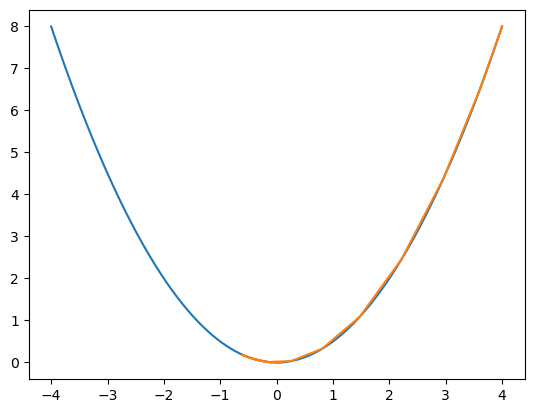

In [91]:
def func1(x):
    return (x**2)/2
def diff1(x):
    return x

x_0 = 4
history_x, history_y, convergence_rate_mom = mommentum(x_0, 1000, 0.1, func1, diff1, gamma = 0.7)

x = np.linspace(-x_0, x_0, 1000)
y = func1(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.plot(history_x, history_y)
plt.show()

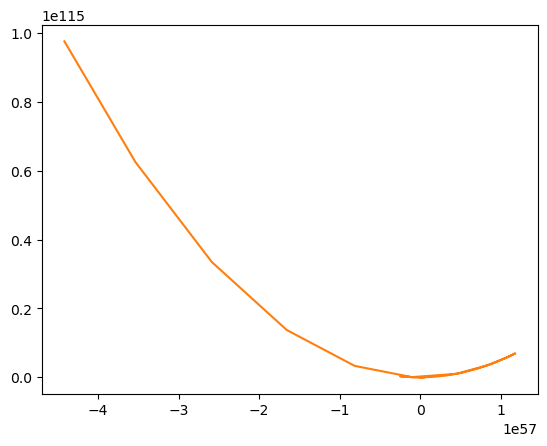

In [93]:
def func1(x):
    return (x**2)/2
def diff1(x):
    return x

x_0 = 4
history_x, history_y, convergence_rate_mom = mommentum(x_0, 1000, 0.1, func1, diff1, gamma = 1.3)

x = np.linspace(-x_0, x_0, 1000)
y = func1(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.plot(history_x, history_y)
plt.show()

In [127]:
def RMSProp(x_0, m, lr, function, diff, beta, epsilon = 10**(-6)):
    previous_x = x_0
    v_t = 0
    history_x = [previous_x]
    history_y = [function(previous_x)]
    convergence_rate = []
    
    for i in range(m):
        g_t = diff(previous_x)
        v_t = beta * v_t + (1 - beta) * g_t**2
        new_x = previous_x - lr / (np.sqrt(v_t) + epsilon) * g_t
        
        new_y = function(new_x)
        history_x.append(new_x)
        history_y.append(new_y)

        if i > 0:
            rate = abs(history_y[-1] - history_y[-2]) / abs(history_y[-2])
            convergence_rate.append(rate)
        
        previous_x = new_x

    return history_x, history_y, convergence_rate

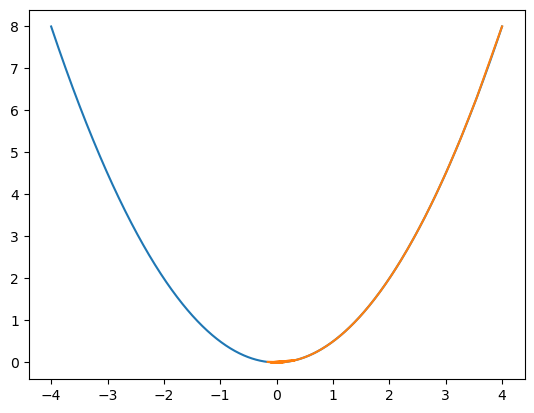

In [129]:
def func1(x):
    return (x**2)/2
def diff1(x):
    return x

x_0 = 4
history_x, history_y, convergence_rate_mom = RMSProp(x_0, 1000, 0.1, func1, diff1, beta = 0.95)

x = np.linspace(-x_0, x_0, 1000)
y = func1(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.plot(history_x, history_y)
plt.show()

In [143]:
def Adam(x_0, m, lr, function, diff, beta1, beta2, epsilon=10**(-6)):
    previous_x = x_0
    m_t = 0
    v_t = 0
    history_x = [previous_x]
    history_y = [function(previous_x)]
    convergence_rate = []
    
    for t in range(1, m + 1):
        g_t = diff(previous_x)
        
        m_t = beta1 * m_t + (1 - beta1) * g_t
        v_t = beta2 * v_t + (1 - beta2) * g_t**2
        new_x = previous_x - lr * m_t / (np.sqrt(v_t) + epsilon)
        new_y = function(new_x)
        history_x.append(new_x)
        history_y.append(new_y)
        
        if t > 1:
            rate = abs(history_y[-1] - history_y[-2]) / abs(history_y[-2])
            convergence_rate.append(rate)
        
        previous_x = new_x

    return history_x, history_y, convergence_rate


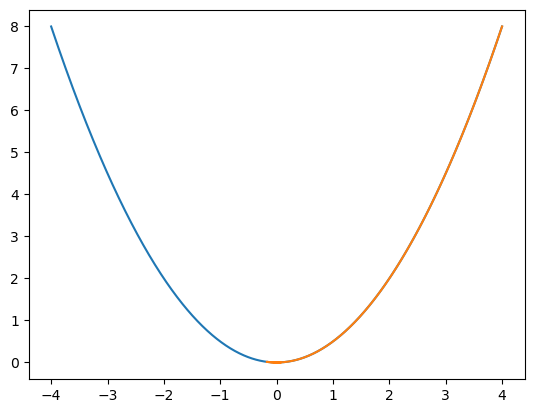

In [145]:
def func1(x):
    return (x**2)/2
def diff1(x):
    return x

x_0 = 4
history_x, history_y, convergence_rate_mom = Adam(x_0, 1000, 0.01, func1, diff1, beta1 = 0.95, beta2 = 0.9)

x = np.linspace(-x_0, x_0, 1000)
y = func1(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.plot(history_x, history_y)
plt.show()

In [161]:
def func1(x):
    return x**4 -10*x**2 - 2*x
def diff1(x):
    return 4*x**3-20*x - 2
x_0 = 0
lr = 0.1
m = 100
history_x_gd, history_y_gd, convergence_rate_gd  = gd(x_0, m, lr, func1, diff1)
history_x_sgd, history_y_sgd, convergence_rate_sgd = sgd(x_0, m, lr, func1, diff1, noise_type = 'uniform', sigma = 0.1)
history_x_mom, history_y_mom, convergence_rate_mom = mommentum(x_0, m, lr, func1, diff1, gamma = 0.9)
history_x_rms, history_y_rms, convergence_rate_rms = RMSProp(x_0, m, lr, func1, diff1, beta = 0.95)
history_x_adam, history_y_adam, convergence_rate_adam = Adam(x_0, m, lr, func1, diff1, beta1 = 0.95, beta2 = 0.9)

OverflowError: (34, 'Result too large')

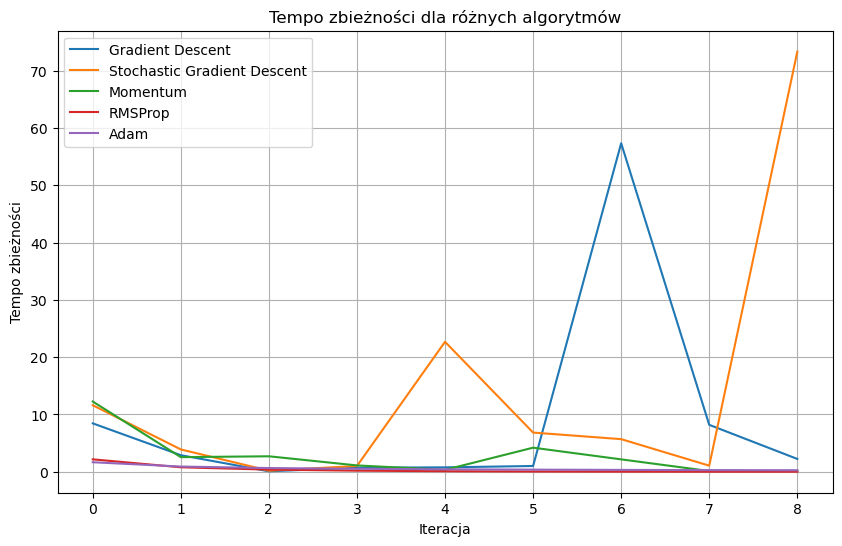

In [163]:
import matplotlib.pyplot as plt

algorithms = ['Gradient Descent', 'Stochastic Gradient Descent', 'Momentum', 'RMSProp', 'Adam']
convergence_rates = [convergence_rate_gd, convergence_rate_sgd, convergence_rate_mom, convergence_rate_rms, convergence_rate_adam]

plt.figure(figsize=(10, 6))
for idx, convergence_rate in enumerate(convergence_rates):
    plt.plot(convergence_rate, label=algorithms[idx])

plt.xlabel('Iteracja')
plt.ylabel('Tempo zbieżności')
plt.title('Tempo zbieżności dla różnych algorytmów')
plt.legend()
plt.grid(True)
plt.show()